<a href="https://colab.research.google.com/github/Karthick93V/Python-Codes/blob/master/Local_Concentration_and_Dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
##Looking at the features

In [4]:
data = pd.read_csv('http://www.dsi.uminho.pt/~pcortez/forestfires/forestfires.csv')

In [5]:
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [6]:
## Local Concentration

In [9]:
from statistics import mean

a1 = data['temp'].mean()  # pandas function
a2 = mean(data['temp'])   # statistics function
a3 = np.mean(data['temp']) # numpy mean

print(f'{a1}, {a2}, {a3}')

18.88916827852998, 18.88916827852998, 18.88916827852998


In [10]:
## Numpy doesn't have a way to compute the mode, so we're going to use the stats library. As you can see, the mode function from the statistics library 
## gives an error as it expects only value to be mode.

from statistics import mode
from scipy import stats

a1 = data['temp'].mode()  # pandas function
##a2 = mean(data['temp'])   # statistics function
a3 = stats.mode(data['temp']) # stats function

print (f'{a1}, {a3}')

0    17.4
1    19.6
dtype: float64, ModeResult(mode=array([17.4]), count=array([8]))


In [11]:
from statistics import median

a1 = data['temp'].median()  # pandas function
a2 = median(data['temp'])   # statistics function
a3 = np.median(data['temp']) # numpy mean

print(f'{a1}, {a2}, {a3}')

19.3, 19.3, 19.3


In [12]:
## 3. Dispersion

In [13]:
from statistics import stdev

a1 = data['temp'].std() # pandas function
a2 = stdev(data['temp']) # statistics function
a3 = np.std(data['temp']) # numpy function

print(f'{a1}, {a2}, {a3}')

5.806625349573503, 5.806625349573505, 5.8010069395983646


In [14]:
from statistics import variance

a1 = data['temp'].var() # pandas function
a2 = variance(data['temp']) # statistics function
a3 = np.var(data['temp']) # numpy function

print(f'{a1}, {a2}, {a3}')

33.7168979503096, 33.71689795030963, 33.65168151326838


In [15]:
## Shape

In [16]:
from scipy.stats import skew

a1 = data['temp'].skew() # pandas function
a2 = skew(data['temp'])  # scipy stats

print(a1, a2)

-0.331172237347285 -0.3302106140354586


In [17]:
from scipy.stats import kurtosis

a1 = data['temp'].kurt() # pandas function
a2 = kurtosis(data['temp'])  # scipy stats

print(a1, a2)

0.1361655076587991 0.12326917606611909


In [23]:
## Describe Model

data.describe()

result = data.describe()
result['temp']

count    517.000000
mean      18.889168
std        5.806625
min        2.200000
25%       15.500000
50%       19.300000
75%       22.800000
max       33.300000
Name: temp, dtype: float64

In [19]:
##Visualization

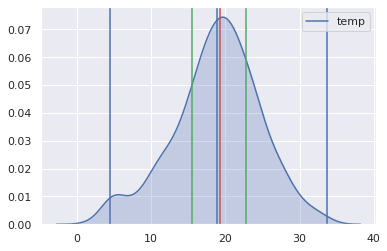

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)
sns.kdeplot(data['temp'], shade = True)

plt.axvline(data['temp'].mean(), 0, 1)
plt.axvline(data['temp'].median(), 0, 1, color = 'r')
plt.axvline(result['temp']['25%'], 0, 1, color = 'g')
plt.axvline(result['temp']['75%'], 0, 1, color = 'g')

IQR = result['temp']['75%'] - result['temp']['25%']

upper_outliers = result['temp']['75%'] + 1.5*IQR
lower_outliers = result['temp']['25%'] - 1.5*IQR

plt.axvline(upper_outliers, 0, 1, color = 'b')
plt.axvline(lower_outliers, 0, 1, color = 'b')



In [ ]:
# Univariate Distribution plots,Lets divide our dataset into intervals of observations and let's call them classes. This way we can plot a histogram.
# It is a set of rectangles on a horizontal axis with centers at the Classmate Point on lends equal to the class intervals sizes. The rectangle is called a bin.
# As you can see, it's rectangle has a same width on the horizontal axis. Although, they don't need to, they are usually the same 
# but can have different heights on a vertical axis. This way, it rectangle area is proportional to the class frequency.This is bcoz our 
# frequency distribution. A histogram let us know what is the shape of the distribution where the mean approximately is on if it has low or high dispersion.
# This lets us introduced frequency Polygon is a line graph, of class frequency Plotted against the classmate points. It basically the same information 
# that in the histogram but plotted in other style. Group data is generally destroyed much of the original detail of the data but highlights the main features 
# contained in both histogram and frequency Polygon. If you are able to choose infinite Bins, it will approximate as max crop, we have a density plot, Lets 
# visualize our distribution of data over a continuous interval on the continuous interval instead of an absolute frequency. It tells us what is called the 
# probability density function. 
# The probability density function is the probability unit on the horizontal axis and its properties is that the area under the curve should sumup to one.
 